# Loading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
df = pd.read_csv('/kaggle/input/data-engineer-salary-in-2024/salaries (2).csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


# Questions to answer:
<ul>
    <li>How is salary spread? What's the mean, standard deviation, and median?</li>
    <li>Can a salary trend be observed amongst data science roles?</li>
    <li>In which country do data specialists earn the highest?</li>
    <li>Which job title is paid the most?</li>
    <li>How does experience affect the salary?</li>
</ul>

# Exploring the data

### Data cleaning 

In [4]:
# Is the data clean?
print(df.isna().sum(),"\n----------------------------------------------") # Are there any missing values?
print(df.duplicated().sum()," Duplicates\n----------------------------------------------") # Are there any duplicaetes?
df.info() # Is data type for each column valid? 

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64 
----------------------------------------------
6421  Duplicates
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio     

In [5]:
# Optimizing the data
df[['experience_level','employment_type','job_title','employee_residence','company_size']] = df[['experience_level','employment_type','job_title','employee_residence','company_size']].astype('category')

In [6]:
print(df.info(),'\n---------------------------------------------')
print(f'Memory usage has been decreased by: {round(0.88/1.4 * 100,2)}%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           16534 non-null  int64   
 1   experience_level    16534 non-null  category
 2   employment_type     16534 non-null  category
 3   job_title           16534 non-null  category
 4   salary              16534 non-null  int64   
 5   salary_currency     16534 non-null  object  
 6   salary_in_usd       16534 non-null  int64   
 7   employee_residence  16534 non-null  category
 8   remote_ratio        16534 non-null  int64   
 9   company_location    16534 non-null  object  
 10  company_size        16534 non-null  category
dtypes: category(5), int64(4), object(2)
memory usage: 880.6+ KB
None 
---------------------------------------------
Memory usage has been decreased by: 62.86%


In [7]:
# Taking closer look at the duplicates
df[df.duplicated(keep=False)].sort_values(by='salary_in_usd').head(25)
# It might be that a company hires multiple people for a position.
# Hence, I will assume that the duplicates are an expected occurrence.
# However, to get more precise image of the salaries I'm going to exclude the duplicates
# to obtain salary per position per company.
df.drop_duplicates(inplace=True)

### Looking for questions to ask

In [8]:
# Locations of companies
df['company_location'].unique()
# Let's see what salaries look like in Poland, where I live, and Russia and Ukraine to get insights into how war affects the data science sector. ----> Added to questions section.

array(['US', 'AU', 'GB', 'CA', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ', 'AR',
       'ES', 'KE', 'LV', 'IN', 'DE', 'IL', 'FI', 'AT', 'BR', 'CH', 'AE',
       'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX', 'PT', 'BA', 'IT',
       'AS', 'IE', 'EE', 'MT', 'HU', 'LB', 'RO', 'VN', 'NG', 'LU', 'GI',
       'CO', 'SI', 'GR', 'MU', 'RU', 'KR', 'CZ', 'QA', 'GH', 'SE', 'AD',
       'EC', 'NO', 'JP', 'HK', 'CF', 'SG', 'TH', 'HR', 'AM', 'PK', 'IR',
       'BS', 'PR', 'BE', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'CN', 'CL', 'MD'],
      dtype=object)

In [9]:
print(df['job_title'].unique())
# There are over 155 job titles! Let's limit the research to the top 10 most frequent job titles. 
df['job_title'].value_counts()

['AI Engineer', 'Data Engineer', 'Machine Learning Engineer', 'ML Engineer', 'Data Analyst', ..., 'Principal Data Architect', 'Data Analytics Engineer', 'Cloud Data Architect', 'Lead Data Engineer', 'Principal Data Analyst']
Length: 155
Categories (155, object): ['AI Architect', 'AI Developer', 'AI Engineer', 'AI Product Manager', ..., 'Software Data Engineer', 'Staff Data Analyst', 'Staff Data Scientist', 'Staff Machine Learning Engineer']


job_title
Data Engineer                      1842
Data Scientist                     1835
Data Analyst                       1384
Machine Learning Engineer           945
Analytics Engineer                  354
                                   ... 
Big Data Developer                    1
CRM Data Analyst                      1
Cloud Data Architect                  1
Data Analytics Associate              1
Staff Machine Learning Engineer       1
Name: count, Length: 155, dtype: int64

In [10]:
top_10_titles = df['job_title'].value_counts().iloc[:10]

In [11]:
top_10_data = df.loc[df.job_title.isin(top_10_titles.index)]
top_10_data.job_title.unique()
# Now I've got a dataframe with with the top 10 most frequent job titles
# Let's answer the questions.

['Data Engineer', 'Machine Learning Engineer', 'ML Engineer', 'Data Analyst', 'Data Scientist', 'Data Architect', 'Research Scientist', 'Data Science', 'Analytics Engineer', 'Research Engineer']
Categories (155, object): ['AI Architect', 'AI Developer', 'AI Engineer', 'AI Product Manager', ..., 'Software Data Engineer', 'Staff Data Analyst', 'Staff Data Scientist', 'Staff Machine Learning Engineer']

In [12]:
top_10_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7559 entries, 2 to 16531
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           7559 non-null   int64   
 1   experience_level    7559 non-null   category
 2   employment_type     7559 non-null   category
 3   job_title           7559 non-null   category
 4   salary              7559 non-null   int64   
 5   salary_currency     7559 non-null   object  
 6   salary_in_usd       7559 non-null   int64   
 7   employee_residence  7559 non-null   category
 8   remote_ratio        7559 non-null   int64   
 9   company_location    7559 non-null   object  
 10  company_size        7559 non-null   category
dtypes: category(5), int64(4), object(2)
memory usage: 466.2+ KB


# Answering the questions

### How is salary spread? What's the mean, standard deviation, and median?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


-----------------------------------------------------------------------------------
Salary in USD in Data Field
 Mean salary: 149664.11 USD
 Median salary: 140800.0 USD
 Most of the people earn between 77349.75 and 221978.47 USD
-----------------------------------------------------------------------------------



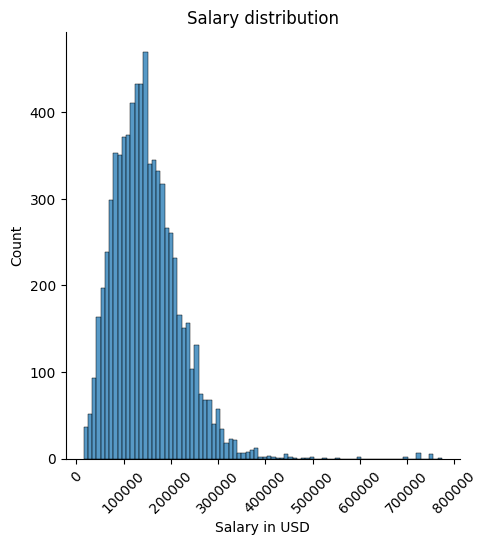

In [13]:
sns.displot(top_10_data.salary_in_usd)
plt.title('Salary distribution')
plt.xticks(rotation=45)
mean = round(top_10_data.salary_in_usd.mean(),2)
median = round(top_10_data.salary_in_usd.median(),2)
std_dev = round(top_10_data.salary_in_usd.std(),2)
print(f'-----------------------------------------------------------------------------------\nSalary in USD in Data Field\n Mean salary: {mean} USD\n Median salary: {median} USD\n Most of the people earn between {round(mean - std_dev,2)} and {round(mean + std_dev,2)} USD\n-----------------------------------------------------------------------------------')
plt.style.use('ggplot')
plt.xlabel('Salary in USD')
print()

### Can a salary trend be observed in the data science sector?

In [14]:
time_series_general = top_10_data.groupby('work_year').salary_in_usd.median()
time_series_poland = top_10_data.loc[top_10_data['company_location'] == "PL"].groupby('work_year').salary_in_usd.median()
time_series_germany = top_10_data.loc[top_10_data['company_location'] == "DE"].groupby('work_year').salary_in_usd.median()
time_series_france = top_10_data.loc[top_10_data['company_location'] == "FR"].groupby('work_year').salary_in_usd.median()
time_series_us = top_10_data.loc[top_10_data['company_location'] == "US"].groupby('work_year').salary_in_usd.median()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0.5, 0, 'Year')

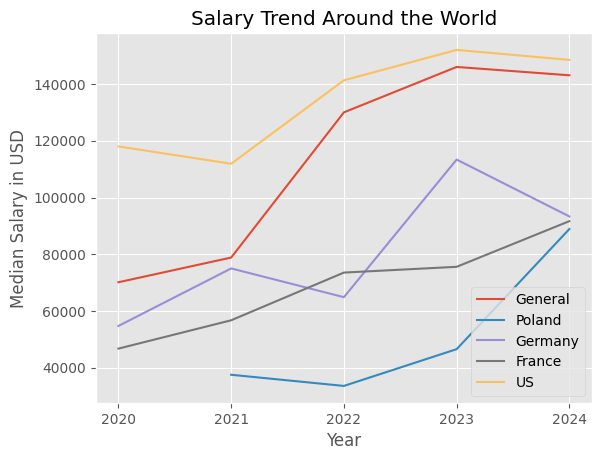

In [15]:
plt.title("Salary Trend Around the World")

sns.lineplot(y=time_series_general, x=time_series_general.index.astype('str'), label='General') 
sns.lineplot(y=time_series_poland, x=time_series_poland.index.astype('str'), label='Poland')  
sns.lineplot(y=time_series_germany, x=time_series_germany.index.astype('str'), label='Germany')  
sns.lineplot(y=time_series_france, x=time_series_france.index.astype('str'), label='France')  
sns.lineplot(y=time_series_us, x=time_series_us.index.astype('str'), label='US')  

rcParams['figure.figsize'] = 10.0, 6.0
plt.ylabel('Median Salary in USD')
plt.xlabel('Year')
# Insufficient information for Ukraine and Russia
# Let's look at other european countries and the USA.

### In which country do data specialists earn the highest?

-----------------------
PR: Puerto Rico
UA: Ukraine
US: United States
NZ: New Zeland
CA: Canada
EG: Egypt
CH: Switzerland
IL: Israel
AU: Australia
DZ: Algeria
-----------------------


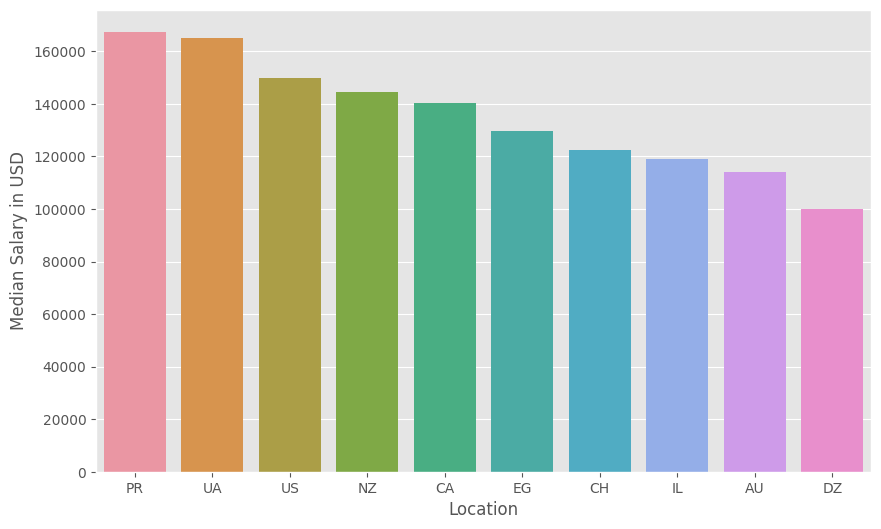

In [16]:
top_10_countries = top_10_data.groupby('company_location').salary_in_usd.median().sort_values(ascending=False).iloc[:10]
sns.barplot(pd.DataFrame(top_10_countries),x=top_10_countries.index,y=top_10_countries)
plt.ylabel('Median Salary in USD')
plt.xlabel('Location')
print('-----------------------\nPR: Puerto Rico\nUA: Ukraine\nUS: United States\nNZ: New Zeland\nCA: Canada\nEG: Egypt\nCH: Switzerland\nIL: Israel\nAU: Australia\nDZ: Algeria\n-----------------------')

### Which job title is paid the most?

Text(0, 0.5, 'Median Salary in USD')

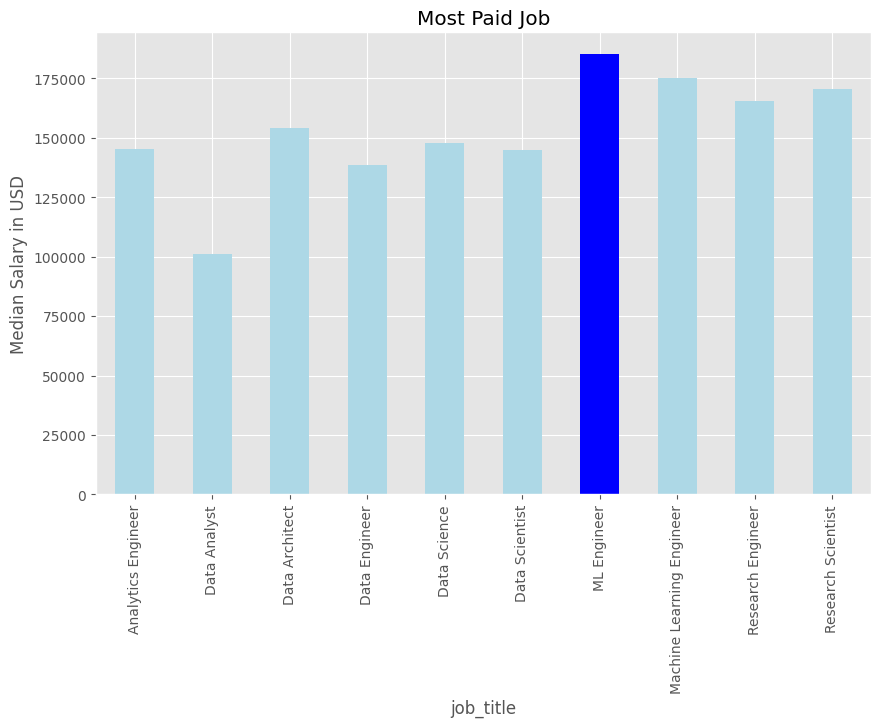

In [17]:
top_10_titles = top_10_data.groupby('job_title',observed=False).salary_in_usd.median().dropna()
colors = ['lightblue','lightblue','lightblue','lightblue','lightblue','lightblue',"blue"]
top_10_titles.plot(kind='bar',color=colors)
plt.title("Most Paid Job")
plt.ylabel('Median Salary in USD')

### How does experience affect the salary?

In [18]:
experience = top_10_data.groupby('experience_level').salary_in_usd.median()

/tmp/ipykernel_18/497463391.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  experience = top_10_data.groupby('experience_level').salary_in_usd.median()


Text(0, 0.5, 'Median Salary in USD')

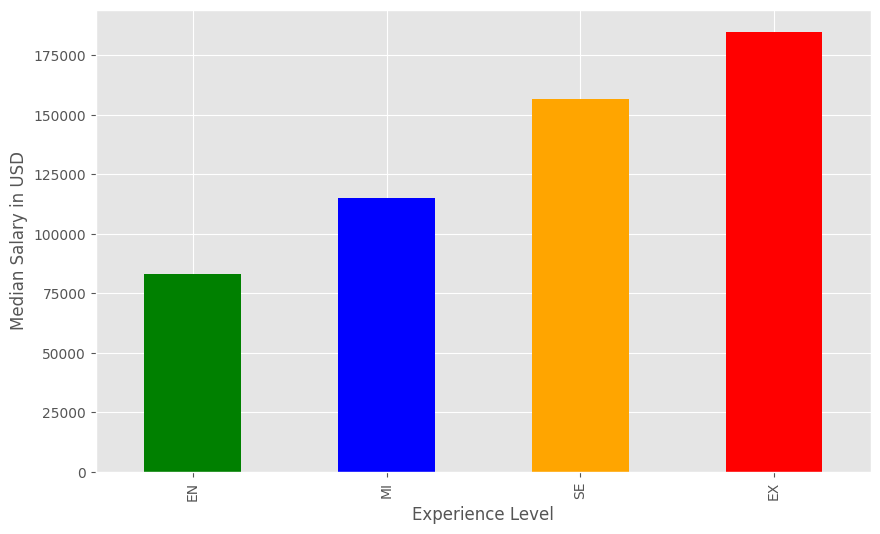

In [19]:
experience.sort_values().plot(kind='bar',color=['green','blue','orange','red'])
plt.xlabel('Experience Level')
plt.ylabel('Median Salary in USD')